In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from day_ahead_v2.utils.plot_settings import apply_plot_settings, color_palette_2

In [2]:
apply_plot_settings()
list_colors = list(color_palette_2.values())
print(list_colors)

[(0.26666666666666666, 0.4666666666666667, 0.6666666666666666), (0.4, 0.8, 0.9333333333333333), (0.13333333333333333, 0.5333333333333333, 0.2), (0.8, 0.7333333333333333, 0.26666666666666666), (0.9333333333333333, 0.4, 0.4666666666666667), (0.6666666666666666, 0.2, 0.4666666666666667), (0.7333333333333333, 0.7333333333333333, 0.7333333333333333)]


In [47]:
# Import the data
model = np.array(["lightgbm", "mlp", "logistic_regression", "bid_forecast", "hindsight"])

data = {}

for m in model:
    data[m] = pd.read_csv(f"/home/yahei/code/day_ahead_v2/reports/large/{m}/imbalance_data/backtest_results.csv")
print(data["hindsight"].tail())
print(data["hindsight"].columns)

    train_profit_total  train_profit_mean  test_profit_total  \
54       903348.441490         179.235802       26362.016036   
55       902504.487146         179.068351       25172.867615   
56       899952.744185         178.562052       25371.519061   
57       893848.920267         177.350976       27162.535386   
58       891210.377953         176.827456       34070.536983   

    test_profit_mean                train_start                  train_end  \
54        156.916762  2024-02-14 00:00:00+00:00  2024-08-12 00:00:00+00:00   
55        149.838498  2024-02-21 00:00:00+00:00  2024-08-19 00:00:00+00:00   
56        151.020947  2024-02-28 00:00:00+00:00  2024-08-26 00:00:00+00:00   
57        161.681758  2024-03-06 00:00:00+00:00  2024-09-02 00:00:00+00:00   
58        202.800815  2024-03-13 00:00:00+00:00  2024-09-09 00:00:00+00:00   

                  valid_start                  valid_end  \
54  2024-08-12 00:00:00+00:00  2024-09-11 00:00:00+00:00   
55  2024-08-19 00:00:00+00

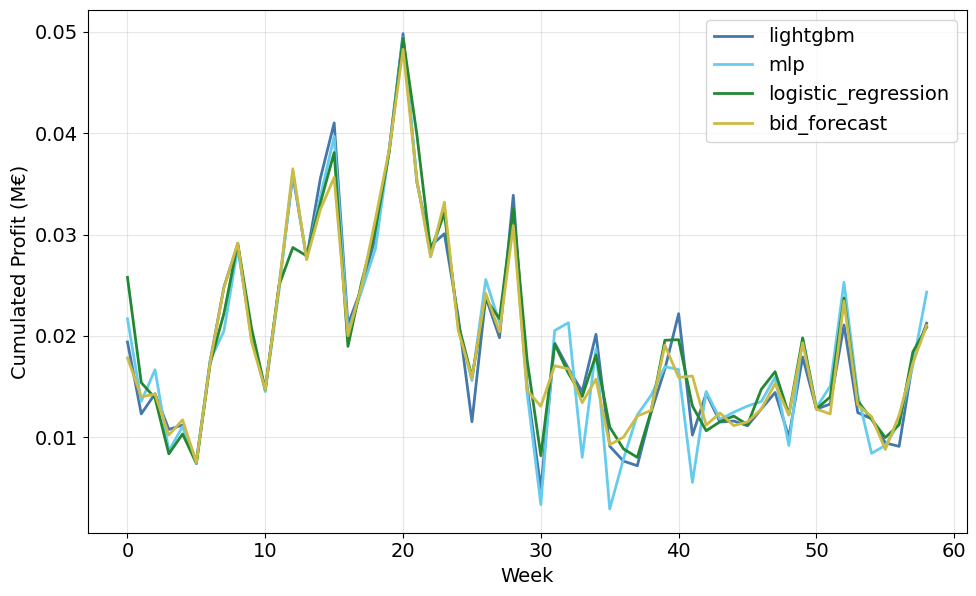

In [48]:
plt.figure()

for i, m in enumerate(model):
    if m in ["hindsight"]:
        continue
    plt.plot(data[m]["test_profit_total"] / 1e6, label=m, linewidth=2, color=list_colors[i])

plt.xlabel("Week")
plt.ylabel("Cumulated Profit (M€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [44]:
# Import the data
model = np.array(["lightgbm", "mlp", "logistic_regression", "bid_forecast", "hindsight"])

data = {}

for m in model:
    data[m] = pd.read_csv(f"/home/yahei/code/day_ahead_v2/reports/large/{m}/imbalance_data/all_test_results_hourly.csv")
print(data["hindsight"].tail())
print(data["hindsight"].columns)

                       datetime  DA_bid  IM_bid      profit
9907  2024-10-15 19:00:00+00:00     7.2  -4.388  262.279092
9908  2024-10-15 20:00:00+00:00     0.0   3.748  328.324786
9909  2024-10-15 21:00:00+00:00     0.0   3.771  153.781372
9910  2024-10-15 22:00:00+00:00     0.0   3.027   70.680450
9911  2024-10-15 23:00:00+00:00     0.0   2.761   35.340799
Index(['datetime', 'DA_bid', 'IM_bid', 'profit'], dtype='object')


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5305/779380598.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(data["logistic_regression"]["DA_bid"].iloc[:]-data["bid_forecast"]["P_W_tilde"].iloc[:], label=f"logistic_regression ($\mu$={np.mean(data['logistic_regression']['DA_bid'].iloc[:20]-data['bid_forecast']['P_W_tilde'].iloc[:20]):.2f})", linewidth=1, color=list_colors[0], alpha=0.7)


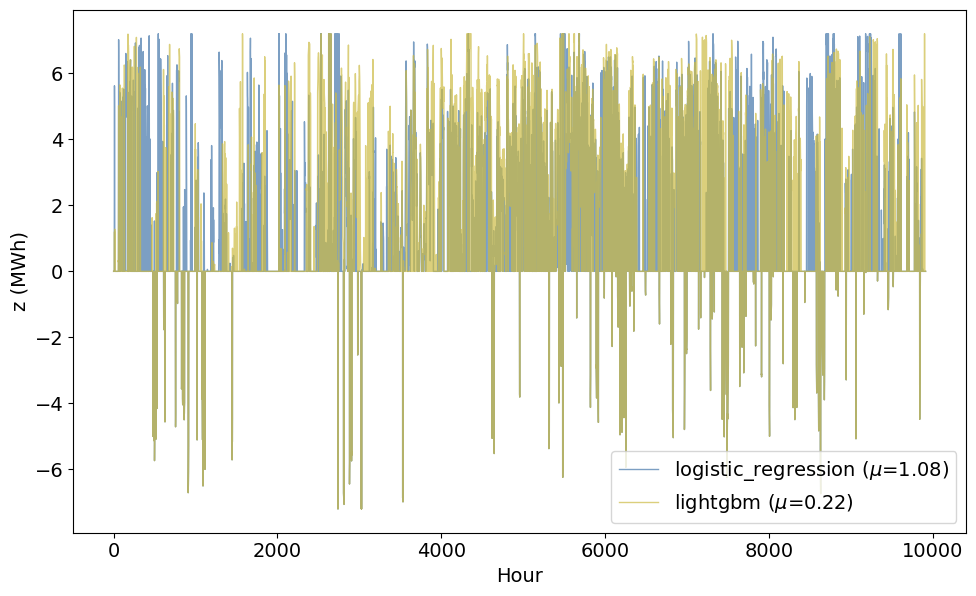

In [45]:
plt.figure()
plt.plot(data["logistic_regression"]["DA_bid"].iloc[:]-data["bid_forecast"]["P_W_tilde"].iloc[:], label=f"logistic_regression ($\mu$={np.mean(data['logistic_regression']['DA_bid'].iloc[:20]-data['bid_forecast']['P_W_tilde'].iloc[:20]):.2f})", linewidth=1, color=list_colors[0], alpha=0.7)
plt.plot(data["lightgbm"]["DA_bid"].iloc[:]-data["bid_forecast"]["P_W_tilde"].iloc[:], label=rf"lightgbm ($\mu$={np.mean(data['lightgbm']['DA_bid'].iloc[:20]-data['bid_forecast']['P_W_tilde'].iloc[:20]):.2f})", linewidth=1, color=list_colors[3], alpha=0.7)
plt.ylabel("z (MWh)")
plt.xlabel("Hour")
plt.tight_layout()
plt.legend()

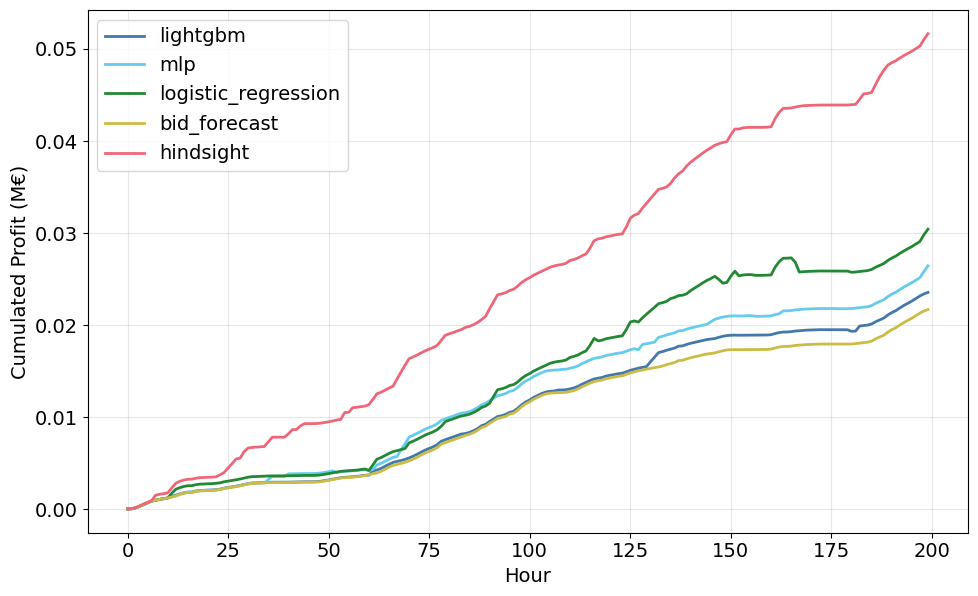

In [34]:
plt.figure()

for i, m in enumerate(model):
    plt.plot(data[m]["profit"].iloc[:200].cumsum() / 1e6, label=m, linewidth=2, color=list_colors[i])

plt.xlabel("Hour")
plt.ylabel("Cumulated Profit (M€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

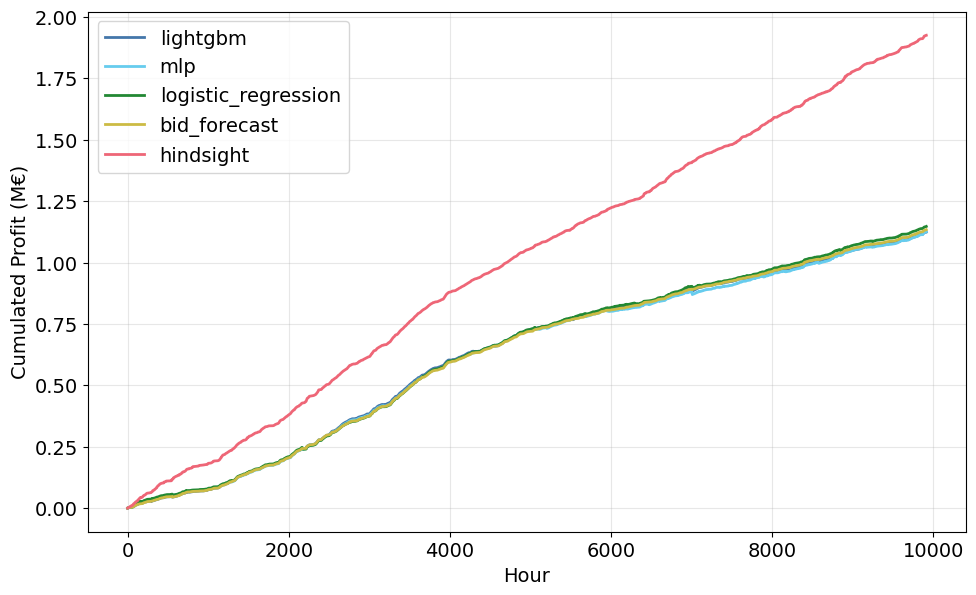

In [37]:
plt.figure()

for i, m in enumerate(model):
    plt.plot(data[m]["profit"].cumsum() / 1e6, label=m, linewidth=2, color=list_colors[i])

plt.xlabel("Hour")
plt.ylabel("Cumulated Profit (M€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()